In [1]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import pynocular as pn
from matplotlib import pyplot as plt

In [2]:
n = pn.PointData()
n['a'] = np.arange(10)
n['b'] = np.arange(20).reshape(-1,2)

In [3]:
n

a,0,1,2,3,4,5,6,7,8,9
b,[0 1],[2 3],[4 5],[6 7],[8 9],[10 11],[12 13],[14 15],[16 17],[18 19]


In [4]:
g = pn.GridData()

In [5]:
g['a'] = np.arange(10)

adding default grid


In [6]:
np.array2string(np.arange(12), precision=2, threshold=6, edgeitems=3)

'[ 0  1  2 ...  9 10 11]'

In [7]:
g.grid

Grid(
Dimension("x",
points = None,
edges = array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))
nbins = 10),)

In [8]:
g['b'] = np.arange(30).reshape(10,-1)

In [9]:
g

x,"[0, 1]","[1, 2]","[2, 3]","[3, 4]","[4, 5]","[5, 6]","[6, 7]","[7, 8]","[8, 9]","[9, 10]"
a,0,1,2,3,4,5,6,7,8,9
b,[0 1 2],[3 4 5],[6 7 8],[ 9 10 11],[12 13 14],[15 16 17],[18 19 20],[21 22 23],[24 25 26],[27 28 29]


In [10]:
g.flat('b')

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17],
       [18, 19, 20],
       [21, 22, 23],
       [24, 25, 26],
       [27, 28, 29]])

In [11]:
g.grid.size

10

In [12]:
g

x,"[0, 1]","[1, 2]","[2, 3]","[3, 4]","[4, 5]","[5, 6]","[6, 7]","[7, 8]","[8, 9]","[9, 10]"
a,0,1,2,3,4,5,6,7,8,9
b,[0 1 2],[3 4 5],[6 7 8],[ 9 10 11],[12 13 14],[15 16 17],[18 19 20],[21 22 23],[24 25 26],[27 28 29]


In [13]:
g.grid.dims.items()

odict_items([('x', Dimension("x",
points = None,
edges = array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))
nbins = 10))])

In [14]:
g['b'].ndim

2

In [15]:
import matplotlib.image as mpimg

img=mpimg.imread('on-fire.jpeg')

In [16]:
g = pn.GridData()

g['bw'] = np.average(img, axis=-1).T[:,::-1] / 255
g['img'] = img.swapaxes(0,1)[:,::-1,:] / 255.

adding default grid


In [17]:
g.grid.vars

['x', 'y']

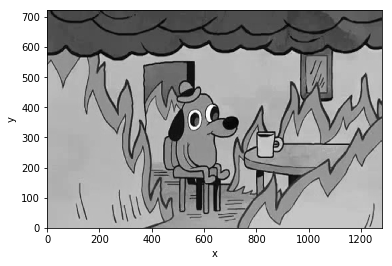

In [18]:
g.plot('bw', cmap='gray')

In [19]:
g['img'].ndim

3

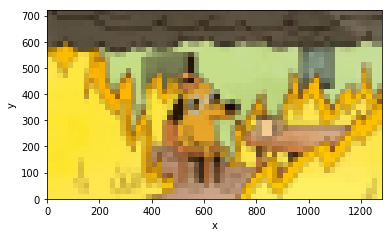

In [20]:
g.binwise(function=np.mean, x=0.05, y=0.05).plot('img')

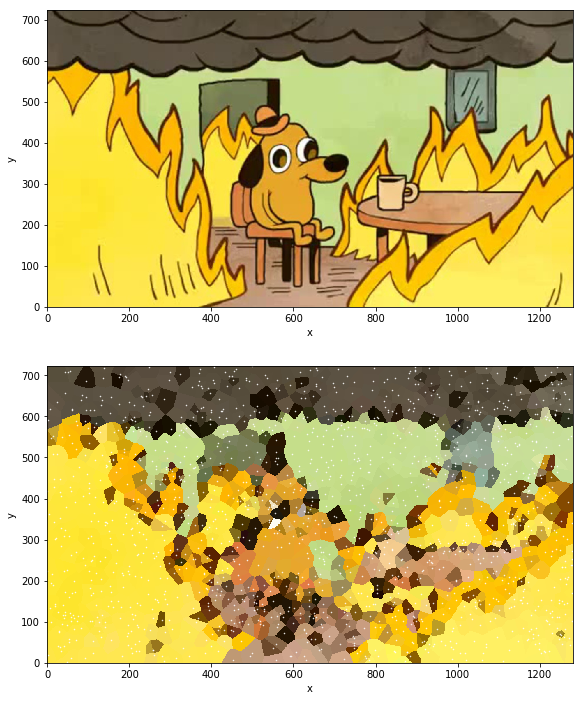

In [21]:
fig, ax = plt.subplots(2,1, figsize=(12,12))
g.plot('img', ax=ax[0])

N=1500
pd = pn.PointData(x=np.random.rand(N)*g.grid['x'].edges[-1], y=np.random.rand(N)*g.grid['y'].edges[-1])
g.lookup(pd).interp(g, method='nearest').plot('img', ax=ax[1])
pd.plot('x', 'y', '.', color='w', ax=ax[1], ms=1)

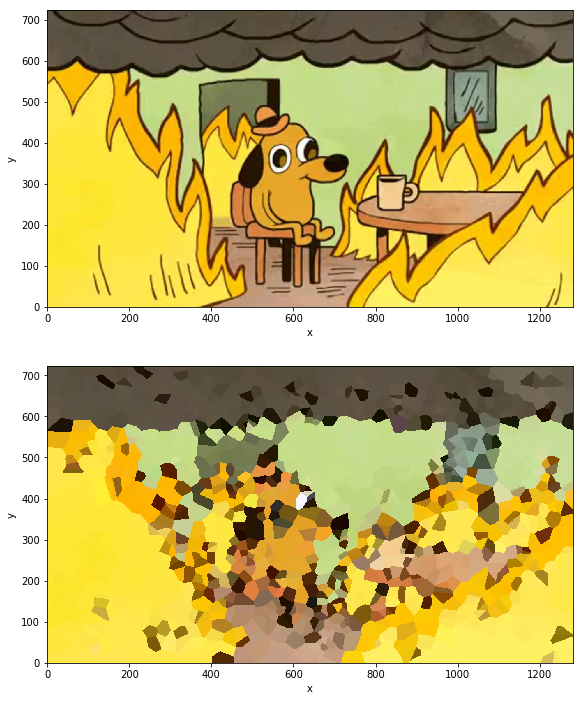

In [22]:
fig, ax = plt.subplots(2,1, figsize=(12,12))
g.plot('img', ax=ax[0])

N=1500
pd = pn.PointData()
pd['x'] = np.random.rand(N)*g.grid['x'].edges[-1]
pd['y'] = np.random.rand(N)*g.grid['y'].edges[-1]
pd['img'] = g.lookup(pd)['img']
g['voronoi'] = pd.interp(g, method='nearest')['img']
g.plot('voronoi', ax=ax[1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


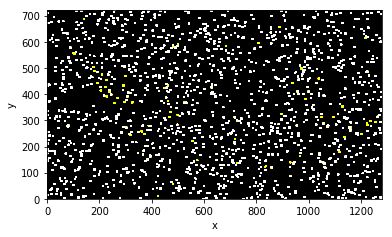

In [49]:
#pk = pd.kde(x=1000, y=1000, bw=1, density=False)
pk['img'] *= 10
pk.plot('img')



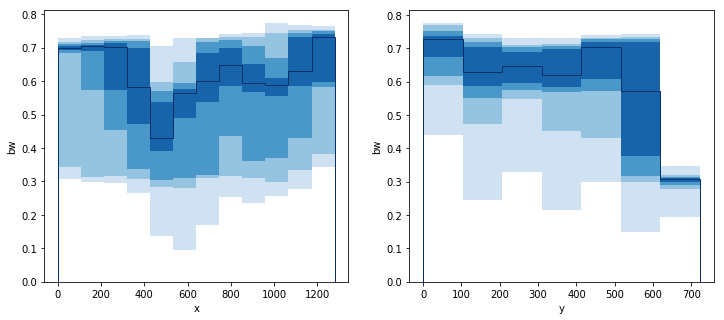

In [50]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

g.binwise(function=lambda x: [np.percentile(x, 10*i) for i in range(1, 10)], x=0.01).plot_bands('bw', ax=ax[0])
g.binwise(function=lambda x: [np.percentile(x, 10*i) for i in range(1, 10)], y=0.01).plot_bands('bw', ax=ax[1])

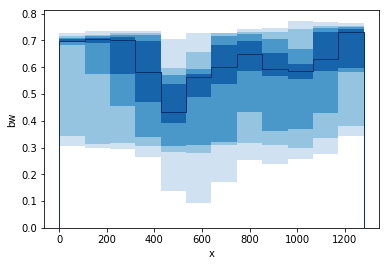

In [51]:
g.binwise(function=lambda x: [np.percentile(x, 10*i) for i in range(1, 10)], x=0.01).plot_bands('bw')
g.kde()

In [ ]:
g['img'].shape

In [ ]:
p = pn.PointData()
p['x'] = np.random.rand(10000) * 2 * np.pi
p['y'] = np.sin(p['x']) + np.random.randn(len(p)) * 0.5
p.plot('.', ms=1)

In [ ]:
p['density'] = p.histogram(x=10, y=10).interp(x=100, y=100).lookup(p)['counts']

In [ ]:
p.plot_scatter('x', 'y', 'density', s=1, cmap='Greens')

In [ ]:
p.binwise(function=lambda x : np.percentile(x, [2.5, 16, 50, 84, 97.5]), x=10).plot_bands('y', cmap='Greens')
#p.plot('x', 'y', '.', color='b', ms=1)

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

p.plot('x', 'y', '.', ms=1, ax=ax[0])
p.binwise(function=lambda x : np.percentile(x, [2.5, 16, 50, 84, 97.5]), x=10).interp(x=200, method='cubic').plot_bands('y', cmap='Greens', ax=ax[1])

# truth
x = np.linspace(0, 2*np.pi, 1000)
ax[1].plot(x, np.sin(x), color='red')
ax[1].plot(x, np.sin(x)+0.5, '--', color='red')
ax[1].plot(x, np.sin(x)-0.5, '--', color='red')
ax[1].plot(x, np.sin(x)+1, ':', color='red')
ax[1].plot(x, np.sin(x)-1, ':', color='red')

In [ ]:
p.binwise(method='mean', x=1000).plot('y', alpha=0.3)
p.binwise(method='mean', x=20).plot('y')
p.binwise(method='mean', x=20).interp(method='cubic', x=1000).plot('y')

In [ ]:
s = pn.GridData()
s.grid['x'].points = np.linspace(0, 3 * np.pi, 20)
s.grid['y'].points = np.linspace(0, 3 * np.pi, 20)
s['z'] = np.cos(s['x']) * np.cos(s['y'])

In [ ]:
s.plot(cbar=True)

In [ ]:
s['z']

In [ ]:
np.sum(s['z'], axis='x')

In [ ]:
np.square(s['z'])

In [ ]:
np.sum(s['z'], axis='y')

In [ ]:
np.mean(s['z'], axis='x')

In [ ]:
s['z'].mean(axis='x')

In [ ]:
s['x']

In [ ]:
test = pn.GridData(x=[0,1,2], y=[0,1,2,3])

In [ ]:
test['a'] = np.arange(6).reshape(2,3)
test['b'] = np.zeros_like(test['a'])

In [ ]:
test

In [ ]:
test['a']

In [ ]:
test['a'].T

In [ ]:
np.mean(test['a'], axis='x')

In [ ]:
np.sum(test['b'], axis='x')

In [ ]:
np.square(test['a'])

In [ ]:
np.max(test['a'], axis='x')

In [ ]:
test['a']

In [ ]:
test['a'][test['x'] > 1]

In [ ]:
test.grid['x'].edges

In [ ]:
test['a'] + test['a'][test['x'] >= test['y']]

In [ ]:
#(test['a'] + 
(test['a'][test['x'] == test['y']])

In [ ]:
test['a'][test['x'] == test['y']]

In [ ]:
test['a']

In [ ]:
(test['a'].data * 300)

In [ ]:
test['a'] ** 2

In [ ]:
np.std(test['a'], axis='x')

In [ ]:
l = np.arange(10)

In [ ]:
l

In [ ]:
mask = l > 5

In [ ]:
mask

In [ ]:
['%s'%s for s in np.asanyarray(np.ma.MaskedArray(l, mask))]

In [ ]:
ma = np.ma.MaskedArray(l, mask)

In [ ]:
(np.asanyarray(ma) * -1).data

In [ ]:
np.array(ma) * -1